# ETRA Challenge Report

## Introduction

In ETRA Challenge, 8 subjects were tested on various tasks including visual fixation, visual search and visual exploration. 
Multiple stimuli were presented, such as, natural images, blank scenes or images from "Where is Waldo" book.
We came up with two, which we want to test:

1. There will be difference in eye movement trajectories between variants `Fixation` and `FreeViewing` in the task type `Blank`.
2. There will be difference in pupil size based on the task and it will also depend on the time elapsed since the start of the experiment.


## Data Format

The dataset is downloaded into directory `data/` which contains:

* `data/` - Directory containing subdirectories with data of each participant stored in CSV files reprezenting each trial. Each file contains 45 seconds of eye tracker data.
* `images/` - Contains the pictures shown during the experiment.
* `DataSummary.csv` - Each row in the file contains info about the clicks of the given participant during the trial. 

Description of the dataset is on the page [ETRA dataset description](https://etra.acm.org/2019/challenge.html).

# Setup

Following part sets up the enviroment to properly run the experiment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

In [2]:
# @formatter:off
%matplotlib inline
# should enable plotting without explicit call .show()

%load_ext pretty_jupyter
#@formatter:on

In [3]:
# Load the dataset using the prepared module `etra.py`.

from etra import ETRA

dataset = ETRA()

Dataset etra already downloaded.
Unpacking etra...


## Load Data

Following part defines function which easily loads specified data from the dataset based on the `subject`, `fv_fixation` and `task_type` parameters.

In [4]:
from etra import read_data

def load_data(
        subject="*",
        fv_fixation="*",
        task_type="*",
    ):
    """
    Loads selected data and sorts them by the time.
    """
    
    selected_files = (dataset.data_dir / "data").glob(f"{subject}/*_{fv_fixation}_{task_type}_*.csv")

    return pd.concat((read_data(f) for f in selected_files)).sort_values(by="Time")

### Examples: 

In [5]:
# Load participant `009`, `Fixation` task and type `Waldo`.
df_009_fix_waldo = load_data(
        subject="009",
        fv_fixation="Fixation",
        task_type="Waldo",
    )

In [6]:
df_009_fix_waldo.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,009,016,Fixation,Waldo,wal014,1614108,473.22,317.625,468.18,314.700,-802.0,2960.0,-858.0,2931.0,722,903
1,009,016,Fixation,Waldo,wal014,1614110,473.30,317.775,467.78,314.775,-801.0,2962.0,-862.0,2932.0,720,904
2,009,016,Fixation,Waldo,wal014,1614112,473.38,317.925,467.46,314.925,-800.0,2963.0,-866.0,2934.0,718,905
3,009,016,Fixation,Waldo,wal014,1614114,473.30,319.125,465.14,315.750,-800.0,2977.0,-889.0,2945.0,720,910
4,009,016,Fixation,Waldo,wal014,1614116,474.82,317.550,465.46,316.800,-785.0,2958.0,-886.0,2957.0,723,908


In [7]:
# Load `Waldo` data from all the participants and both `Fixation` and `FreeViewing`.
df_waldo = load_data(        
        task_type="Waldo",
    )

In [8]:
df_waldo.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,062,001,Fixation,Waldo,wal002,262296,461.70,297.375,467.62,299.550,-1418.0,3197.0,-1353.0,3218.0,744,962
1,062,001,Fixation,Waldo,wal002,262298,462.58,298.875,469.06,300.825,-1425.0,3197.0,-1354.0,3216.0,744,963
2,062,001,Fixation,Waldo,wal002,262300,463.22,298.650,468.98,301.125,-1418.0,3194.0,-1355.0,3220.0,746,961
3,062,001,Fixation,Waldo,wal002,262302,463.22,299.400,469.46,301.050,-1418.0,3203.0,-1350.0,3219.0,747,961
4,062,001,Fixation,Waldo,wal002,262304,462.58,299.250,469.30,302.025,-1425.0,3201.0,-1352.0,3230.0,747,962


# Hypotheses

Following part describes the hypotheses and its testing.

## Hypothesis 1: 
### "There will be difference in eye movement trajectories between variants `Fixation` and `FreeViewing` in the task type `Blank`."

During the task `Fixation` participants must keep their focus on the fixed point of the screen. 
On the other hand during `FreeViewing` task they are able to move their eyes in any direction. 
We expect that the trajectory of the eye movement will differ in the puzzle task types (`Puzzle` and `Waldo`), 
because it would be imposible to solve the puzzle without moving the eyes (for `FreeViewing` part).
We also expect that the participant would discover the picture in the task type `Natural` and the trajectories would differ too.

The interesting example could be the task type `Blank`. In this task there is nothing in the picture just blank picture.
The participant during the `FreeViewing` task could either stare on the fixed point of the picture which would lead 
to same trajectories as in the `Fixation` tasks or randomly fluctuate their focus on the picture.
This idea is the main motivation to test the hypothesis above.


(Note: The original hypothesis was that the trajectories would differ in the tasks `Puzzle` and `Waldo`. 
However, the hypothesis was based on the wrong understanding of the task `Fixation` for the types `Puzzle` and `Waldo` 
and it does not make much sense to test this hypothesis now (it would almost certaily lead into the difference of the trajectories.
This is the reason why we decided to change to hypothesis to the one described above.)

### Data Preparation

For this experiment, we restricted only on the data of the task type `Blank` from the arbitrary choosen participant `009`. We have choosen only one arbitrary participant, because of the selected statistical tests which assume independent variables. This condition will not be fulfilled for the multiple participants.  
Then we used the following columns (names of the columns are renamed variants of the names from the original table (original names could be found below):
* `time` - Time in milliseconds from the begining of the trial (normalized from the absolute values to relative (starts from 0).
* `fv_fixation` - Indicator of either `FreeViewing` or `Fixation` task.
* `trial` - ID of the trial
* `x`, `y` - Coordinates of the left eye focus. In order to simplify the testing we have decided to study only left eye trajectory, because we expect that the trajectories of the left and right eye are similar.

In the following blocks of code we provide example of the described data preparation.

In [9]:
# Extraction of the data from the participant with ID `009` for the `Blank` task type.
hyp1_var = load_data(subject="009", task_type="Blank")

In [10]:
# Display first rows of the extracted data.
hyp1_var.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,009,004,FreeViewing,Blank,grey,524232,533.22,245.775,523.70,235.050,566.0,521.0,454.0,413.0,823,964
1,009,004,FreeViewing,Blank,grey,524234,533.94,246.300,523.38,233.925,573.0,525.0,449.0,401.0,820,973
2,009,004,FreeViewing,Blank,grey,524236,531.94,247.200,521.78,233.475,553.0,538.0,432.0,398.0,823,964
3,009,004,FreeViewing,Blank,grey,524238,533.30,246.600,523.38,238.650,566.0,530.0,454.0,452.0,824,977
4,009,004,FreeViewing,Blank,grey,524240,532.02,247.575,524.34,238.725,554.0,542.0,464.0,452.0,823,977


In [11]:
# Rename the parameters for the future usage.
hyp1_var = hyp1_var\
    .rename(
        {
            "Time": "time",
            "trial_id": "trial",
            "fv_fixation" : "fv_fixation",
            "LXpix": "x", 
            "LYpix": "y",
        },
        axis = 1
    )

# Drop the redundant parameters.
hyp1_var = hyp1_var\
    [
        [
            "time",
            "trial",
            "fv_fixation",
            "x",
            "y",
        ]
    ]

# Time normalization (to start from 0).
hyp1_var["time"] = hyp1_var.groupby(["trial"])["time"].transform(lambda x: x - x.min())

#### Distance Computation

Next step of the pre-processing was to reduce the amount of data in each trial. We divided the data into intervals of 10 following measurements and computed the mean of the coordinates (columns `x` and `y`). In most cases it should be 20 ms intervals of the trial (measurements are typicaly separated by 2 ms). The computation of the mean should also filter random fluctuations of the eye movement data caused by inaccurate measurement. Then, we computed the distance between each pair of the consecutive interval means from the trial. This information describes the movement of the eye focus in the specific time interval and we used it to test the first hypothesis. Finally, we remove the abundand columns.

The described preprocessing could be seen in the following code blocks.

In [12]:
def create_interval_means(
        data : pd.DataFrame,
        x_col="x",
        y_col="y",
        interval_size=10,
    ):
    """
    Creates new table of means of coordinates for intervals of size `interval_size`.
    """
    
    num_rows = data.shape[0]
    datas = []

    for start_point in range(0, num_rows, interval_size):
        slice_data = data.loc[start_point:min(start_point + interval_size, num_rows - 1), ("x", "y")]
        if not slice_data.empty:
            interval_means = slice_data.mean()
            datas.append(interval_means)
    
    return pd.DataFrame(datas)

In [13]:
def compute_distance(
        data : pd.DataFrame,
        x_col="x",
        y_col="y",
        dist_name="distance",
    ):
    """
    Computes distance between each pair of the consecutive coordinates.
    """

    # Compute distance between consecutive pairs of points.
    data[dist_name] = np.sqrt((data[x_col] - data[x_col].shift())**2 + (data[y_col] - data[y_col].shift())**2)

    # Remove the first row, which has a NaN value for distance.
    return data.dropna()

In [14]:
# Compute means of the coordinates for each trial in fixed time intervals. Then compute distance between each pair of the consecutive coordinate means.
hyp1_var_avg_x_y = hyp1_var\
    .groupby(["trial", "fv_fixation"])\
    .apply(create_interval_means)\
    .reset_index()\
    .groupby(["trial", "fv_fixation"])\
    .apply(compute_distance)\
    .reset_index(drop=True)\
    .groupby(["trial", "fv_fixation"])\
    .agg(avg_distance=("distance", np.mean))\
    .reset_index()\
    .drop("trial", axis=1)

In [15]:
# Show the prepared data for hypothesis testing.
hyp1_var_avg_x_y.head()

,fv_fixation,avg_distance
0,FreeViewing,5.826678
1,Fixation,1.375381
2,FreeViewing,7.560105
3,Fixation,1.690413
4,FreeViewing,9.837648


### Hypothesis testing

We have to formally define the null and alternative hypothesis to test. State means of trajectory differences for `FreeViewing` $\mu_0$ and `Fixation` $\mu_1$ for `Blank` task type.

$H_0$ (null hypothesis): $\mu_0 = \mu_1$

$H_1$ (alternative hypothesis): $\mu_0 \neq \mu_1$

We compute the summary statistics for average traveled distance for both `FreeViewing` and `Fixation` tasks. 

In [16]:
hyp1_var_avg_x_y.groupby("fv_fixation").describe().round(decimals=2)

avg_distance                                          
                   count  mean   std   min   25%   50%   75%   max
fv_fixation                                                       
Fixation            15.0  1.80  0.41  1.38  1.44  1.69  2.26  2.53
FreeViewing         15.0  6.17  2.12  3.36  4.25  5.95  7.42  9.84

We have decided to use the paired t-test, which is wildly used to test data points linked to each other. However, this test assumes that we are testing independent random variables (fulfilled by choosing only 1 participant) from the normal distribution with not known variance. Let us then look at the distributions of the `avg_distance`:

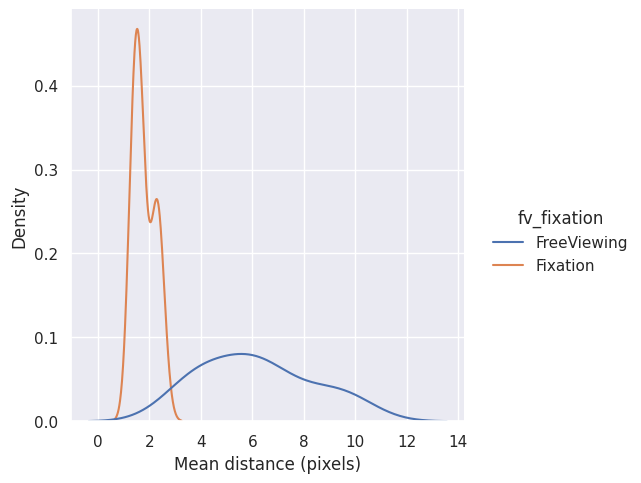

In [17]:
g = sns.displot(
        data=hyp1_var_avg_x_y,
        x='avg_distance',
        hue='fv_fixation',
        kind="kde",
   )

g.set_axis_labels("Mean distance (pixels)")
g.set_titles("Distributiona nejaek kecz")


The distributions above looks roughly like normal distribution, so we can use the paired t-test:

In [18]:
stats.ttest_rel(
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "FreeViewing")].avg_distance,
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "Fixation")].avg_distance,
)

Ttest_relResult(statistic=7.553155546087788, pvalue=2.6562601597399225e-06)

Resulting p-value from the paired t-test is `p = 2.656e-06`. Using the significance level $\alpha = 0.05$ we reject the null hypothesis $H_0$, meaning that the trajecories of the eye movement differ between `FreeViewing` and `Fixation` tasks for `Blank` task type for participant `009`.

### Discusion

We have rejected the null hypothesis $H_0$. The reason of this result could be that participant during the `FreeViewing` task randomly moves their focus between several arbitrary points in the blank picture. In contrast in `Fixation` task they tried to focus on the fixed point. The distribution of the mean distance of the eye focus above also supports this idea. It shows that during `FreeViewing` task the distribution of the traveled distance had higher variance and its mean was also significantly higher than in `Fixation` task.

For better understanding of the different behaviour between `FreeViewing` and `Fixation`. In the future work we could compare the results of the other task types between each other. These results could be for example used to determine the difference between trajectories of puzzle solving tasks and `Natural` and `Blank` tasks or to determine how the focus of the participants differ in `Fixation` task for diferent task types. The hypothesis testing above could be also improved by filtering errorous movements from the data instead of computing the mean of the intervals.

## Hypothesis 2:
### "There will be difference in pupil size based on the task and it will also depend on the time elapsed since the start of the experiment".

The motivation to test this hypothesis is the correlation between pupil size and excitement of the participant. During `Blank` the participant probably will not be very excited and the average pupil size would be relatively small. It is hard to determine the behaviour during the task type `Natural`, because pupil size could depend on the specific picture (if it is interesting or not). In the tasks `Puzzle` and `Waldo`, we expect that pupil size would depend on the succes of solving the task. Additionaly, we expect that excitement of the participants will decline in time so as the pupil size.

In order to test hypothesis above we decided to compare the average pupil size between the task `Blank` and other types of tasks.

### Data Preparation

In order to test the hypothesis we extracted data from only one arbitrary choosen participant with ID `059` (because of usage of t-test). We also extracted only data from `FreeViewing` task, because `Fixation` task is not relevant in terms of testing of our hypothesis. 

We extracted and renamed the following columns:
* `time` - Time in milliseconds from the begining of the trial (normalized from the absolute values to relative (starts from 0).
* `trial` - ID of the trial.
* `task` - Type of the task.
* `lp` - Size of the left pupil. We arbitrary selected the left pupil size as simplification of the problem, because we expect that the size will change synchronously on the left and on the right.

In [35]:
# We choose only subject `059` and `FreeViewing` task.
hyp2_var = load_data(subject="059", fv_fixation="FreeViewing")

In [37]:
hyp2_var.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,059,001,FreeViewing,Natural,nat009,952510,450.50,224.700,458.10,191.550,-1601.0,4313.0,-1494.0,3939.0,2327,2158
1,059,001,FreeViewing,Natural,nat009,952512,450.58,223.650,457.22,197.100,-1600.0,4300.0,-1508.0,4001.0,2334,2223
2,059,001,FreeViewing,Natural,nat009,952514,450.66,224.325,459.78,198.525,-1600.0,4308.0,-1482.0,4019.0,2344,2224
3,059,001,FreeViewing,Natural,nat009,952516,450.34,223.425,458.74,198.300,-1602.0,4297.0,-1493.0,4016.0,2325,2246
4,059,001,FreeViewing,Natural,nat009,952518,449.70,223.500,457.86,199.200,-1608.0,4297.0,-1502.0,4025.0,2325,2247


In [38]:
# Rename the parameters.
hyp2_var = hyp2_var.rename(
        {
            "Time": "time",
            "trial_id": "trial",
            "task_type": "task",
            "LP": "lp",
        },
        axis = 1
    )

# Get only necessary parameters. Choose only left pupil.
hyp2_var = hyp2_var\
    [
        [
            "time",
            "trial",
            "task",
            "lp",
        ]
    ]

# Normalize time to always start from the 0.
hyp2_var["time"] = hyp2_var\
    .groupby("trial")["time"]\
    .transform(lambda x: x - x.min())

#### Blinks Removal

Because we wanted to analyze the change of the pupil size we had to somehow deal with the blinks of the respondent. Because of that prepared function to remove the blink candidates from the dataset. Firstly, we have to detect the blinks. For this problem we used the lower estimate of the average human pupil size which is 2 mm (https://www.ncbi.nlm.nih.gov/books/NBK381/). To ensure that we will not reduce large number of the correct data from the participant with small pupil size, we detected blink when the pupil size is less than 1 mm (half of the bottom average estimate). We also used the estimation of blink duration from (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4043155/#RSIF20130227C2) which states that blink duration is approximately $1/3$ s. Based on that estimation we removed 160 ms interval before and after the detected blink peak to remove the data affected by the blink.

This preprocessing could also help with removing erroneous pupil size data. The implementation of the function to remove blinks is in the code blocks below.

In [44]:
def remove_blinks(
        data : pd.DataFrame,
        pupil_column='lp',
        blink_treshold=100, 
        blink_duration=80,  # Remove 160 ms before and after blink.
    ):
    """
    Removes all blink candidates and their adjacent interval from the data.
    """
    
    new_data = data.copy()
    num_rows = new_data.shape[0]
    
    # Find all time candidates for the blink (lower than `blink_treshold`).
    blink_peaks = np.where(new_data[pupil_column].lt(blink_treshold))[0]
    for peak in blink_peaks:
        # For each blink candidate get rid of the data around the blink
        # (to eliminate whole blinking interval).
        new_data\
            .loc[
                max(0, peak - blink_duration):
                    min(peak + blink_duration, num_rows),
                pupil_column
            ] = pd.NA
    
    return new_data.dropna()

In [40]:
def plot_blinks(
        data: pd.DataFrame,
        trial_id,
    ):
    before = data[data.trial == trial_id].assign(blinks_removed='No')
    after = remove_blinks(before).assign(blinks_removed='Yes')
    hlp = pd.concat([before, after])

    g = sns.relplot(
        data=hlp, 
        x='time', y='lp',
        kind='line',
        row='blinks_removed',
        aspect=3
    )
    g.set_xlabels("Time (ms)")
    g.set_ylabels("Pupil size")
    g.axes[0, 0].set_title(f"Pupil size as measured :trial {trial_id}")
    g.axes[1, 0].set_title(f"Pupil size with blinks removed :trial {trial_id}")

The first plot below shows the left pupil size in the time for the trial `045`. The second plot shows the same data after removing the blink candidates. It is easy to estimate from the plot where the blinks probably happened. When we compare the data before and after pre-processing we can say that the function for removing blinks worked fairly well. We hav choosen the trial `045` because it is an example with large number of the blink candidates and nicely ilustrates the function of the pre-processing (but we can also see some blink candidates which were probably erroneously left in the data).

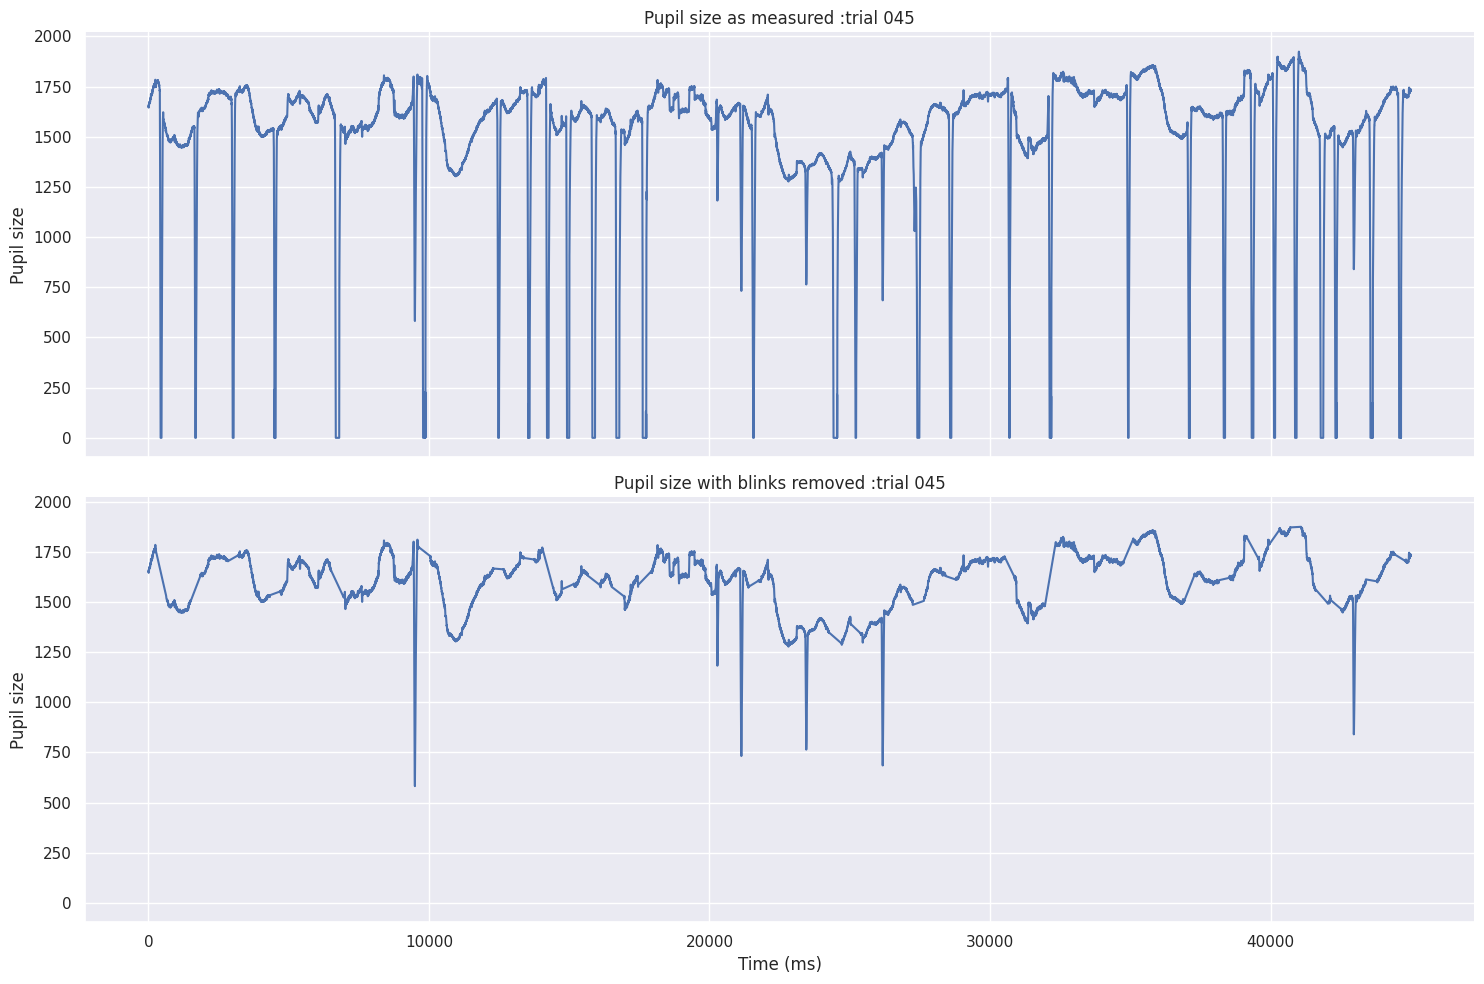

In [42]:
plot_blinks(hyp2_var, "045")

In [26]:
# hyp2_var_avg_pupil = hyp2_var\
#     .groupby(["participant", "trial"])\
#     .apply(remove_blinks)\
#     .reset_index(drop=True)\
#     .groupby(["participant", "trial", "task"])\
#     .agg(avg_rp=("rp", np.mean))\
#     .reset_index()\
#     .drop("trial", axis=1)
hyp2_var_avg_pupil = hyp2_var\
    .groupby("trial")\
    .apply(remove_blinks)\
    .reset_index(drop=True)\
    .groupby(["trial", "task"])\
    .agg(avg_lp=("lp", np.mean))\
    .reset_index()\
    .drop("trial", axis=1)

In [27]:
hyp2_var

,time,trial,task,lp
0,0,001,Natural,2327
1,2,001,Natural,2334
2,4,001,Natural,2344
3,6,001,Natural,2325
4,8,001,Natural,2325
...,...,...,...,...
22493,44986,118,Puzzle,1899
22494,44988,118,Puzzle,1901
22495,44990,118,Puzzle,1893
22496,44992,118,Puzzle,1896


In [28]:
hyp2_var_avg_pupil.head()

,task,avg_lp
0,Natural,1753.389439
1,Puzzle,2106.059251
2,Puzzle,1970.623613
3,Blank,1515.667416
4,Puzzle,1650.441576


### Hypotheses to test:

Null hypothese: Pupil size is the same for the fixed scene X and arbitraty choosen other scene Y.
Alternative hypothese: Pupil size is different for the fixed scene X and arbitrary choosen other scene Y.

We have choosen scene "Blank" as a fixed scene X and rest of the scenes as Y to check.

In [29]:
hyp2_var_avg_pupil.groupby("task").describe().round(decimals=2)

avg_lp                                                              
         count     mean     std      min      25%      50%      75%      max
task                                                                        
Blank     15.0  1305.19  240.37   916.42  1154.34  1293.88  1434.81  1833.55
Natural   15.0  1630.97  199.74  1127.76  1543.55  1603.07  1767.04  1942.03
Puzzle    15.0  1756.77  201.88  1395.06  1623.32  1754.99  1868.49  2106.06
Waldo     15.0  1616.95  146.31  1364.82  1503.89  1639.14  1720.05  1889.60

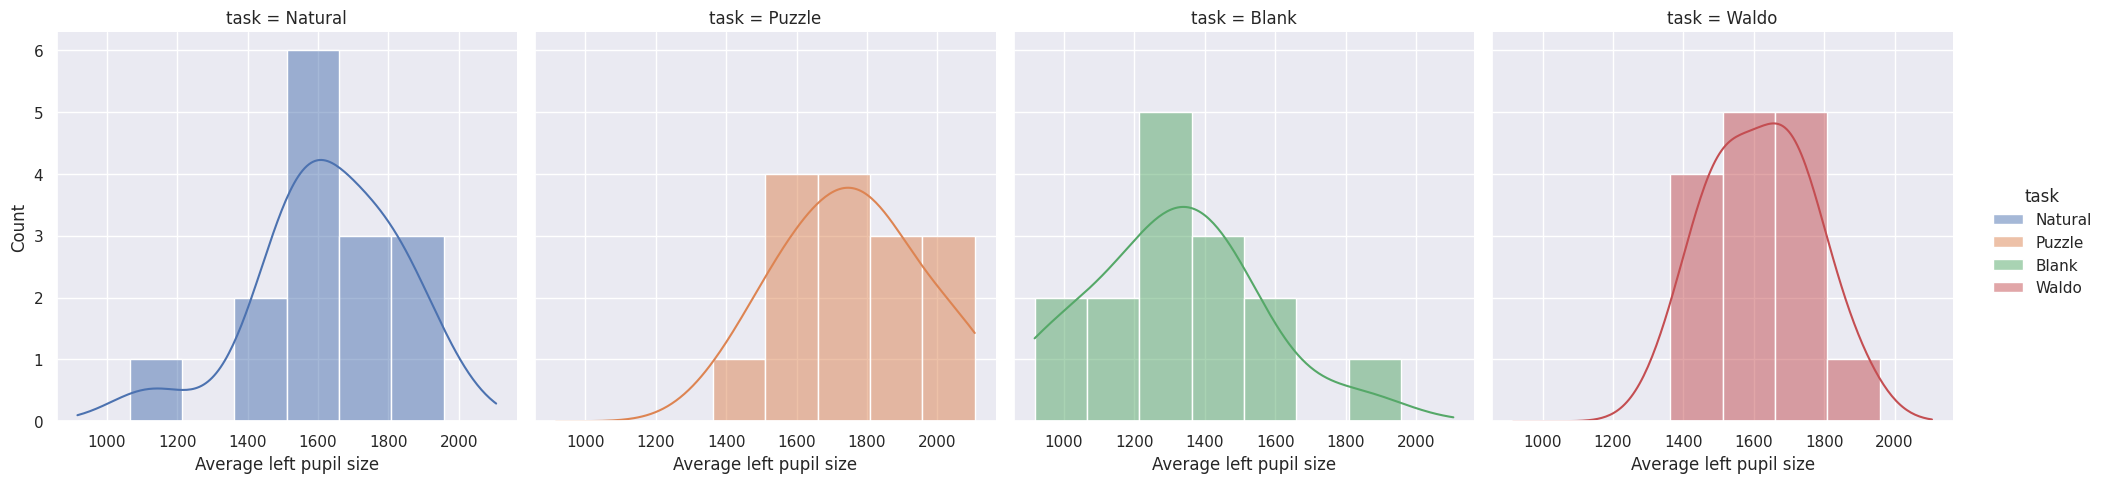

In [30]:
g = sns.displot(
    data=hyp2_var_avg_pupil,
    x='avg_lp',
    hue='task',
    col="task",
    kde=True,
    )
g.set_xlabels("Average left pupil size")
g.set_ylabels("Count")

In [31]:
hyp2_var_avg_pupil.head()

,task,avg_lp
0,Natural,1753.389439
1,Puzzle,2106.059251
2,Puzzle,1970.623613
3,Blank,1515.667416
4,Puzzle,1650.441576


In [32]:
for alt_task in ["Natural", "Puzzle", "Waldo"]:
    ttest_result = stats.ttest_rel(
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == "Blank"].avg_lp,
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == alt_task].avg_lp,
    )
    
    wilcoxon_result = stats.ranksums(hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == "Blank"].avg_lp,
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == alt_task].avg_lp
        )
    
    print(ttest_result)
    print(wilcoxon_result)

Ttest_relResult(statistic=-4.25384379533128, pvalue=0.0008021427744128531)
RanksumsResult(statistic=-3.5048967281888372, pvalue=0.00045678443326107037)
Ttest_relResult(statistic=-6.961561810825649, pvalue=6.64047320640631e-06)
RanksumsResult(statistic=-4.044111609448659, pvalue=5.252189644329421e-05)
Ttest_relResult(statistic=-4.887082833538028, pvalue=0.00024001804370789965)
RanksumsResult(statistic=-3.5463747959780543, pvalue=0.0003905702877707525)


## Data manipulation

This is an optional section, in which you could describe, what did you do with the data to obtain given format. In our example, we just need to merge the data. Additionally, we want to detect fixations

In [33]:
from etra import detect

df_hyp1_samples = pd.concat([df_fix_puzzle, df_fix_waldo]).rename(
    {"Time": "time", "trial_id": "trial", "LXpix": "x", "LYpix": "y"}, axis=1)
df_hyp1_samples["time"] = df_hyp1_samples.groupby(["participant_id", "trial"])["time"].transform(lambda x: x - x.min())

df_hyp1_fix = []
groups = df_hyp1_samples.groupby(["participant_id", "trial"])
for (pid, trial), group in groups:
    tmp = detect(group)
    tmp = tmp[tmp["label"] == "FIXA"]
    tmp["participant_id"] = pid
    tmp["trial"] = trial
    df_hyp1_fix.append(tmp)

df_hyp1_fix = pd.concat(df_hyp1_fix)
df_hyp1_fix = df_hyp1_samples[
    ["participant_id", "trial", "fv_fixation", "task_type", "stimulus_id"]].drop_duplicates().merge(df_hyp1_fix, on=[
    "participant_id", "trial"], how="left")

ImportError: cannot import name 'detect' from 'etra' (/home/david/source/bioinformatika/computational_neuroscience/etra_challenge/etra.py)

In [ ]:
df_hyp1_fix.head()

## Results

In this section, describe statistical test that you used for testing your hypotheses. In general, the selection of statistical test depends on the type of variable.

There are following types of variables:

* Continuous - when the variable behaves as number. All fixation durations, pupil size, time are continuous variables
* Ordinal - variables do not behave as numbers, but you can order them. Grades in school are typical example. You can't say how many times is 1 better than 2, but you can say that 1 is better grade than 2. There are no nominal variables in this dataset, so I added this description only for completeness.
* Nominal - when variables are qualitative different. Type of task is an example of nominal variable

In the case of two variables, there are following options
* both variables continuous - regression or correlation (in R function `lm()` or `cor`/`cor.test` )
* both variables nominal - contingency tables a chi square test
* one variable nominal, other continuous - this is very common, this type is used, when we compare differences two condition - in this case, we use t.tests

There are three main types of t.tests

* Independent t-test - both groups contain independent data points (each data point is a different entity)
* Paired t-test - data points are linked to each other. This is typical example, when we measure same subjects multiple times
* One sample t-test - we are testing the sample against some theoretically interesting number

In case of more than two variables, we need to use ANOVAs. Usually, one variable will be dependent (outcome, the one which levels interest us) and others will be independent (predictors, the one, that we manipulate).
* For more than two groups, we use between-subject ANOVA
* For more than two measurement of same subject, we use within-subject ANOVA
* We can combine multiple between- and within-subject factors into mixed ANOVA

In our case, the simplest way how to test that is to aggregate data per each trial and use t-tests

### using t-tests

Because we have multiple data points from each participant, we can first aggregate data for each trial

In [ ]:
avg_durations = df_hyp1_fix.assign(dur=lambda x: x.end_time - x.start_time)\
    .groupby(["task_type", "trial"])\
    .agg(avg_dur=("dur", "mean"))\
    .reset_index()
avg_durations

In [ ]:
ttest_result = stats.ttest_rel(
    avg_durations[avg_durations.task_type == "Puzzle"].avg_dur,
    avg_durations[avg_durations.task_type == "Waldo"].avg_dur,
)

In [ ]:
%%jinja markdown

Results show that there is no difference between Fixation duration in Where is Waldo and Puzzle (pvalue={{"{:.3}".format(ttest_result.pvalue)}})